In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import NearestCentroid, KNeighborsRegressor
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score

In [2]:
def plot_confusion_matrix(cf_matrix):
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False)
    ax.set_title('Confusion Matrix');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values\n');
    ax.xaxis.set_ticklabels(['economy', 'microsoft', 'obama', 'palestine'])
    ax.yaxis.set_ticklabels(['economy', 'microsoft', 'obama', 'palestine'])

# 2.1
### Importieren Sie den Datensatz

In [3]:
df = pd.read_csv("data/news.csv")
df

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
0,99248.0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,0.000000,-0.053300,-1,-1,-1
1,10423.0,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,0.208333,-0.156386,-1,-1,-1
2,18828.0,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-0.425210,0.139754,-1,-1,-1
3,27788.0,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,0.000000,0.026064,-1,-1,-1
4,27789.0,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,0.000000,0.141084,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...
93234,61851.0,Stocks rise as investors key in on US economy ...,The June employment report is viewed as a cruc...,MarketWatch,economy,2016-07-07 15:31:05,0.104284,0.044943,-1,3,5
93235,61865.0,Russian PM proposes to use conservative and to...,"In addition, establish stimulating economic po...",TASS,economy,2016-07-07 15:31:10,0.072194,0.000000,-1,0,1
93236,104793.0,Palestinian Government Uses Foreign Aid To Pay...,The Palestinian government spends nearly $140 ...,Daily Caller,palestine,2016-07-07 15:38:26,0.291667,-0.139754,5,1,0
93237,104794.0,Palestine Youth Orchestra prepares for first U...,Palestine Youth Orchestra prepares for first U...,Ahram Online,palestine,2016-07-07 15:59:22,0.121534,0.092313,0,0,0


# 2.2
### Untersuchen Sie den Datensatz

In [4]:
df.describe()

,IDLink,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
count,93239.000000,93239.000000,93239.000000,93239.000000,93239.000000,93239.000000
mean,51560.653257,-0.005411,-0.027493,113.141336,3.888362,16.547957
std,30391.078704,0.136431,0.141964,620.173233,18.492648,154.459048
min,1.000000,-0.950694,-0.755433,-1.000000,-1.000000,-1.000000
25%,24301.500000,-0.079057,-0.114574,0.000000,0.000000,0.000000
50%,52275.000000,0.000000,-0.026064,5.000000,0.000000,0.000000
75%,76585.500000,0.064255,0.059709,33.000000,2.000000,4.000000
max,104802.000000,0.962354,0.964646,49211.000000,1267.000000,20341.000000


# 3.
### Formulieren Sie 3 verschiedene, mögliche Supervised Learning Tasks (Classification, Regression), welche mit Hilfe dieses Datensatzes realisiert werden können. Beschreiben Sie für jeden Task, die Feature Matrix (X) und die Labels (y). Welche Transformationen der Daten sind notwendig, damit es funktioniert?

### 1. Vorhersage des Themas anhand des Titels
_Typ:_ Klassifizierung
_Features:_ ``Title``
_Labels:_ ``Topic``
_Transformationen:_
- ``Title`` --> Bag-of-Words (evtl. mit N-Grams)
- ``Topic`` --> One-hot encoding

### 2. Vorhersage der Stimmung des Titels anhand der Stimmung der Schlagzeile
_Typ:_ Regression
_Features:_ ``SentimentHeadline``
_Labels:_ ``SentimentTitle``
_Transformationen:_ Keine

### 3. Vorhersage der Stimmung des Titels und der Schlagzeile anhand der Popularität
_Typ:_ Regression
_Features:_ ``Facebook``, ``GooglePlus``, ``LinkedIn``
_Labels:_ ``SentimentTitle``, ``SentimentHeadline``
_Transformationen:_ Samples, bei denen alle 3 Features einen negativen Wert haben, entfernen.

# 4.
Finden Sie 3 interessante/nützliche Eigenschaften (Statistiken) über den Datensatz und visualisieren Sie diese mit Hilfe von Plots. Formulieren Sie, welche Hinweise Ihnen diese Eigenschaften geben für die Machine Learning Tasks.

array([[<Axes: title={'center': 'SentimentTitle'}>,
        <Axes: title={'center': 'SentimentHeadline'}>]], dtype=object)

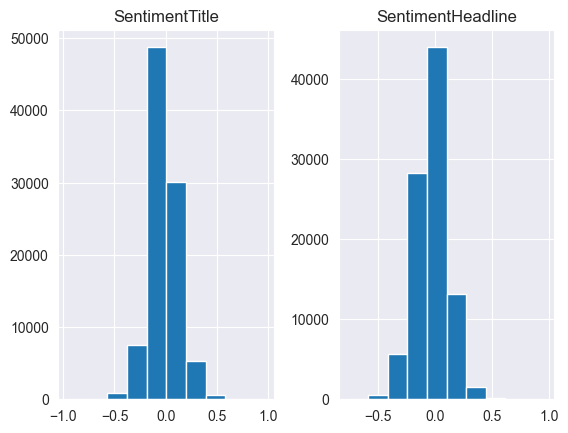

In [5]:
df.hist(column=["SentimentTitle", "SentimentHeadline"])

Die Stimmung des Titels scheint durchschnittlich etwas negativer als die Stimmung der Schlagzeile zu sein.

<Axes: >

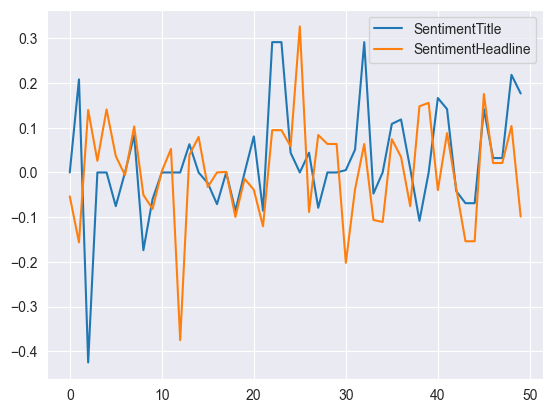

In [6]:
df[["SentimentTitle", "SentimentHeadline"]][:50].plot.line()

In vielen Fällen scheint es eine Beziehung zwischen der Stimmung der Schlagzeile und der Stimmung des Titels zu geben. Das ist aber nicht immer der Fall.

<Axes: ylabel='IDLink'>

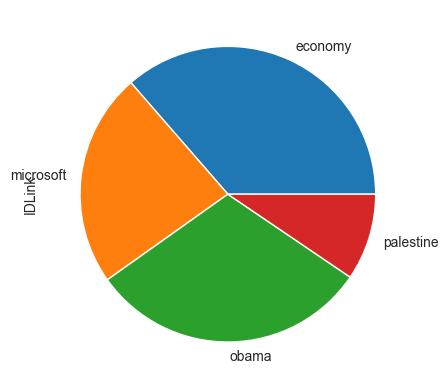

In [7]:
df.groupby("Topic")["IDLink"].count().plot.pie()

Es gibt 4 verschiede Themen im Datensatz. Das Thema "palestine" ist deutlich weniger als die anderen Themen vorhanden.

# 5.
Implementieren Sie 2 Ihrer formulierten Machine Learning Tasks.

### 1. Vorhersage des Themas anhand des Titels
_Algorithmus:_ Nearest Centroid Classification

Für jede Klasse wird ein Centroid berechnet. Bei der Vorhersage wird jedes Sample der Klasse mit dem nächsten Centroiden zugeordnet.

Using: euclidean metric
              precision    recall  f1-score   support

     economy       0.99      0.80      0.88      3740
   microsoft       1.00      0.94      0.97      2263
       obama       0.99      0.95      0.97      2986
   palestine       0.51      0.99      0.67      1011

    accuracy                           0.90     10000
   macro avg       0.87      0.92      0.88     10000
weighted avg       0.94      0.90      0.91     10000


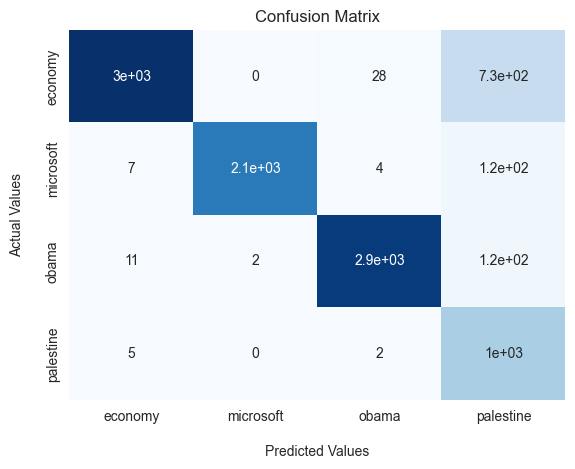

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df[:50000]["Title"], df[:50000]["Topic"], test_size=0.2)

# perform bag-of-words encoding on feature matrix
cv = CountVectorizer()
X_train = cv.fit_transform(X_train.tolist()).toarray()
X_test = cv.transform(X_test.tolist()).toarray()

# perform one-hot encoding on labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# find a metric to use via cross validation and fit classifier
param_grid = {"metric": ["euclidean", "manhattan"]}
ncc = GridSearchCV(NearestCentroid(), param_grid, cv=5).fit(X_train, y_train)
y_pred = ncc.predict(X_test)

print(f"Using: {ncc.best_params_['metric']} metric")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))
cf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cf_matrix)

### Verbesserungsmöglichkeiten
1. Beim Bag-Of-Words-Encoding n-grams verwenden. Dadurch bleibt ein gewisser Teil der Struktur des Textes erhalten, da die Tokens nicht mehr aus einzelnen Wörtern bestehen.
2. Beim Bag-Of-Words-Encoding Inverse Document Frequency oder Stopwords anweden. Dadurch werden häufig vorkommende Wörter, die weniger über den Inhalt aussagen, weniger gewichtet bzw. entfernt.

### 2. Vorhersage der Stimmung des Titels anhand der Stimmung der Schlagzeile
_Algorithmus:_ K-Nearest Neighbors Regression

KNN ist normalerweise ein Klassifizierungs-Algorithmus. Bei der Vorhersage wird zuerst der Abstand vom Sample zu allen Punkten im Trainings-Set berechnet. Die Abstände werden dann aufsteigend sortiert. Das Sample wird dann zur Klasse zugeordnet, die unter den k nächsten Nachbarn am häufigsten vorkommt.
Durch Interpolation kann man den Klassifizierungs-Algorithmus zu einem Regressions-Algorithmus umwandeln.

MSE: 0.01871234713901692
MAE: 0.10058038888618338
R2: -0.006417235276041877


<Axes: >

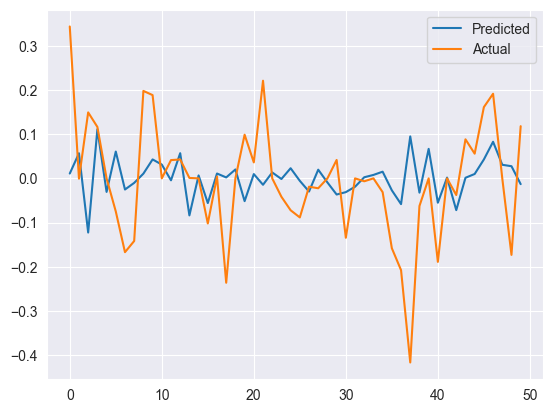

In [9]:
# add an extra dimension to the feature matrix
X = df["SentimentHeadline"].to_numpy().reshape(-1, 1)
y = df["SentimentTitle"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# find optimal k via cross validation and fit regressor
param_grid = {"n_neighbors": range(1, 20)}
knr = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5).fit(X_train, y_train)
y_pred = knr.predict(X_test)

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"R2: {r2_score(y_test, y_pred)}")

# merge the predicted and actual values
result_array = np.array([y_pred, y_test])
result = pd.DataFrame({"Predicted": result_array[0, :], "Actual": result_array[1, :]})
result[:50].plot.line()

### Verbesserungsmöglichkeiten
1. Ein weiteres Feature hinzufügen, wie z. B. die Popularität des Artikels. Dadurch könnten die Vorhersagen evtl. genauer werden.
2. Eventuell eine andere Distanzmetrik verwenden oder die einzelnen Punkte anders gewichten.